# Measurements

Qubits are a superposition of $|0\rangle$ and $|1\rangle$. We write an arbitrary qubit $|\psi\rangle$ as:

$|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$

When a measurement is made, however, the output will be either 0 or 1. There is a $|\alpha^{2}|$ probability that the measurement will be 0 and a $|\beta^{2}|$ probability that the measurement will be 1.

Because the measurement is either 0 or 1, $|\alpha^{2}| + |\beta^{2}| = 1$

To try to guess $|\alpha^{2}|$ and $|\beta^{2}|$, a quantum computer (or simulator) can count each measurement and calculate the count divided by number of tries to discover the approximate probabilities $|\alpha^{2}|$ and $|\beta^{2}|$.

We may extract the counts of each measurement from a circuit using the **qasm_simulator** in Qiskit, or running on a real quantum computer on IBM Q Experience.

In [24]:
from qiskit import *
from qiskit.visualization import plot_histogram

The Qiskit simulators are available in the _Aer_ module. For this notebook, we will explore mostly the **qasm_simulator** because we are interested in simulating the measurements that a quantum computer would give.

In [25]:
simulator = Aer.get_backend("qasm_simulator")

By default, all qubits start as $|0\rangle$. We can verify this by using an empty circuit. In the following code, we use a system with no gates and one measurement device to ensure that 0 is always measured.

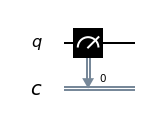

In [26]:
circuit = QuantumCircuit(1, 1)
circuit.measure(0, 0)
circuit.draw(output="mpl")

In [27]:
job = execute(circuit, backend=simulator, shots=2**15)
result = job.result()
counts = result.get_counts()
print(counts)

{'0': 32768}


The simulator returns a dictionary where each key is a measurement and each value is the count of that measurement. Often, it is useful to have a histogram of the counts: that is possible with the **plot_histogram** from *qiskit.visualization*

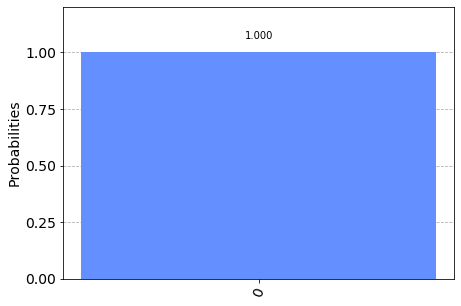

In [28]:
plot_histogram(counts)

For a single qubit, there are two possible measurements: 0 and 1. To achieve a $|1\rangle$ component in our qubit, we can use a $X$ gate

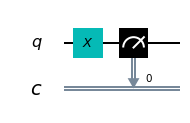

In [29]:
circuit = QuantumCircuit(1, 1)
circuit.x(0)
circuit.measure(0, 0)
circuit.draw(output="mpl")

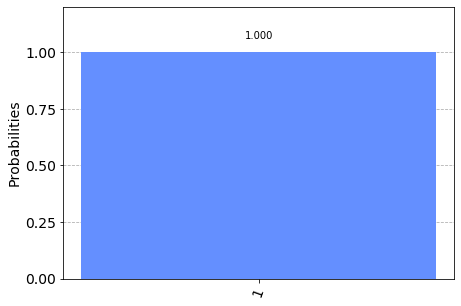

In [30]:
counts = execute(circuit, backend=simulator, shots=2**15).result().get_counts()
plot_histogram(counts)

If there is superposition, then it is possible that some of the times the measurement will be 0 and others it will be 1.

An example of gate that generates superposition is $H$. Let's see how the measurements perform when that happens

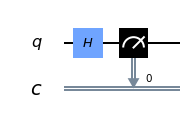

In [31]:
circuit = QuantumCircuit(1, 1)
circuit.h(0)
circuit.measure(0, 0)
circuit.draw(output="mpl")

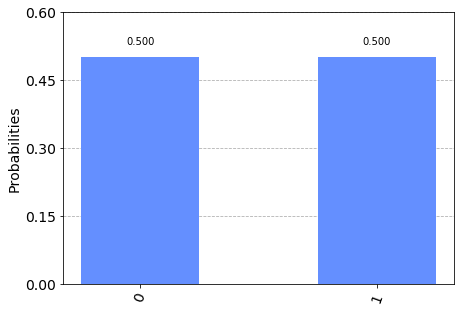

In [12]:
counts = execute(circuit, backend=simulator, shots=2**15).result().get_counts()
plot_histogram(counts)

## Global Phase

One possible thought is: is it possible to differentiate between $|0\rangle$, $-|0\rangle$ or $i|0\rangle$?

We can build circuits to achieve those states and compare!

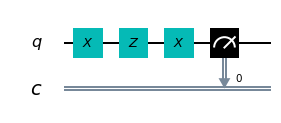

In [32]:
# Circuit to generate -|0>
circuit = QuantumCircuit(1, 1)
circuit.x(0)
circuit.z(0)
circuit.x(0)
circuit.measure(0, 0)
circuit.draw(output="mpl")

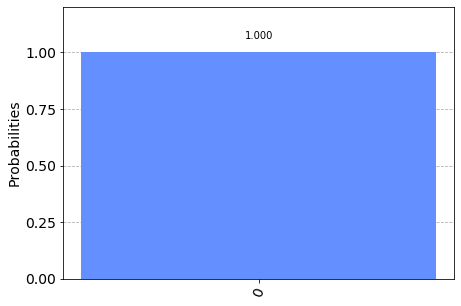

In [33]:
counts = execute(circuit, backend=simulator, shots=2**15).result().get_counts()
plot_histogram(counts)

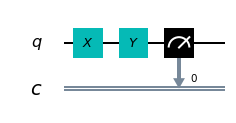

In [34]:
# Circuit to generate i|0>
circuit = QuantumCircuit(1, 1)
circuit.x(0)
circuit.y(0)
circuit.measure(0, 0)
circuit.draw(output="mpl")

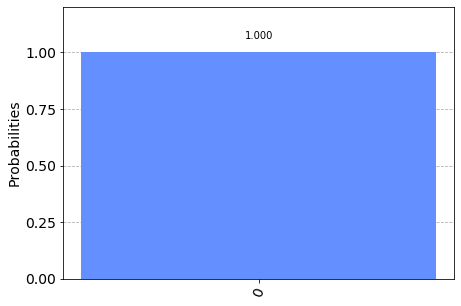

In [35]:
counts = execute(circuit, backend=simulator, shots=2**15).result().get_counts()
plot_histogram(counts)

It turns out that no! In general, if we multiply a qubit by a number $z \in \mathbb{C}$ such that $|z|^{2} = 1$, then it has no effects in the measurements!

Notice that $z$ can be written using Euler's identity:

$$
z = e^{i\theta}
$$

Where, $\theta \in [0, 2\pi]$ and $e$ is Euler's number.

Hence we call that global phase: if we multiply by $z$, we are adding a global phase that can be ignored. Thus, in practice, $|\psi\rangle = e^{i\theta}|\psi\rangle$